# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
# Import API key, not working
#from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) #size is 20 to account for api limits
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
range_city = len(cities)
print(range_city)

581


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Pulling info from the Weather API, setting request url
#url = 'http://api.openweathermap.org/data/2.5/weather?'

#parameter will be the cities list
city_param = {'units':'imperial','appid': 'dd48e7cdd6cf74e1585917a7462655a8'}
#reason for hard code of api key, jupyter notebook was bugging out...


In [4]:
#weather list
cit_n = []
cloud = []
country = []
lat = []
lon = []
date = []
humid = []
temp = []
wind = []

In [5]:
#Run iteration to parse through each city in cities list

print('---'*15 + '\nBeginning Data Retrieval\n' + '---'*15)

for city in cities: #looping through the cities list
    try:
        get_city_weather = owm.get_current(city,**city_param)
        
#open weather variables... I know it's very convoluted.
        cn = get_city_weather['name']
        cit_n.append(cn)
        print(f"Processing record of {cn}")
        cloud.append(get_city_weather['clouds']['all'])
        country.append(get_city_weather['sys']['country'])
        lat.append(get_city_weather['coord']['lat'])
        lon.append(get_city_weather['coord']['lon'])
        date.append(get_city_weather['dt'])
        
#Getting the 'main' contents, because get_city_weather didn't work. If you're wondering.
        get_main = owm.get_current(city, **city_param)
        hum = get_main['main']['humidity']
        humid.append(hum)
        
        temp.append(get_main['main']['temp_max'])
           
        ws = get_main['wind']['speed']  
        wind.append(ws) 
    except:
        print("City not found...")
print("---"*15 + "\nData Retrieval Done\n" + "---"*15)


---------------------------------------------
Beginning Data Retrieval
---------------------------------------------
Processing record of Dunedin
City not found...
Processing record of Thinadhoo
Processing record of Matara
Processing record of Moose Factory
Processing record of Pangnirtung
Processing record of Ribeira Grande
Processing record of East London
Processing record of Mahebourg
Processing record of Sawakin
Processing record of Leningradskiy
Processing record of Butaritari
Processing record of Mataura
Processing record of Busselton
Processing record of Batamshinskiy
Processing record of Vaini
Processing record of Torbay
Processing record of Yuli
Processing record of Cape Town
Processing record of San Jeronimo
Processing record of Qaanaaq
Processing record of Port Elizabeth
City not found...
Processing record of Ancud
Processing record of Albany
Processing record of Beboto
Processing record of Ushuaia
Processing record of Clyde River
Processing record of Hermanus
Processing rec

Processing record of Muroto
Processing record of Srednekolymsk
Processing record of Vestmannaeyjar
Processing record of Nishihara
Processing record of Manaus
Processing record of Loreto
Processing record of Batticaloa
Processing record of Dunkirk
Processing record of Pocoes
Processing record of Rome
Processing record of Rosehearty
Processing record of Kargasok
Processing record of Warrnambool
Processing record of Saint George
Processing record of Mena
Processing record of Russell
Processing record of Enshi
Processing record of Lamar
City not found...
City not found...
Processing record of Vanimo
Processing record of Grindavik
Processing record of Jalu
Processing record of Kokuy
Processing record of Trincomalee
Processing record of Cradock
Processing record of Komsomolskiy
City not found...
City not found...
Processing record of Tezu
Processing record of Kibre Mengist
Processing record of Nova Olinda do Norte
Processing record of San Patricio
Processing record of Diffa
Processing record

Processing record of Genhe
Processing record of Tres Arroyos
City not found...
Processing record of Mombasa
Processing record of Bugene
Processing record of Chifeng
Processing record of Yumen
Processing record of Ati
Processing record of Pacasmayo
City not found...
Processing record of Kedrovyy
Processing record of Jaisalmer
Processing record of Timmins
Processing record of Ahuimanu
Processing record of Cooma
Processing record of Skjervoy
Processing record of San Vicente
City not found...
City not found...
---------------------------------------------
Data Retrieval Done
---------------------------------------------


In [6]:
#To verify api has appended everything into the lists
#again I know, very convoluted
print(len(cit_n))
print(len(cloud))
print(len(country))
print(len(lat)) 
print(len(lon))
print(len(date))
print(len(humid))
print(len(temp))
print(len(wind))

516
516
516
516
516
516
516
516
516


In [7]:
city_weather = {'City': cit_n,'Cloudiness': cloud,'Country':country,'Date':date,'Humidity':humid,'Lat':lat,
                'Lon': lon,'Max Temp':temp,'Wind Speed':wind}
weather_df = pd.DataFrame(city_weather)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Dunedin,100,NZ,1574523508,92,-45.87,170.50,55.00,5.99
1,Thinadhoo,100,MV,1574524006,74,0.53,72.93,83.62,8.68
2,Matara,100,BI,1574524007,96,-3.48,29.48,59.74,3.62
3,Moose Factory,90,CA,1574524007,93,51.26,-80.61,32.00,13.87
4,Pangnirtung,90,CA,1574524007,94,66.15,-65.72,32.00,10.29


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#export file to csv
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
#get current date with time module
current_day = time.strftime('%m/%d/%Y', time.localtime())

#read csv file
csv_df = pd.read_csv('output_data/cities.csv')

#deletes any 'Unnamed' columns, always run into this issue at work...
csv_df = csv_df.loc[:,~csv_df.columns.str.contains('^Unnamed')]

#read cleaned up file
csv_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Dunedin,100,NZ,1574523508,92,-45.87,170.50,55.00,5.99
1,Thinadhoo,100,MV,1574524006,74,0.53,72.93,83.62,8.68
2,Matara,100,BI,1574524007,96,-3.48,29.48,59.74,3.62
3,Moose Factory,90,CA,1574524007,93,51.26,-80.61,32.00,13.87
4,Pangnirtung,90,CA,1574524007,94,66.15,-65.72,32.00,10.29


#### Latitude vs. Temperature Plot

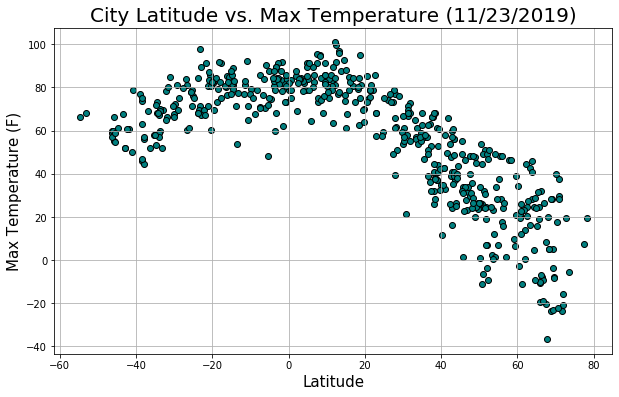

In [10]:
lat_temp = csv_df[['Lat','Max Temp']]

#set figure size, for preference
plt.figure(figsize=(10,6))
#create scatter plot
plt.scatter(csv_df['Lat'],csv_df['Max Temp'],color='teal',edgecolor='black')

#beautify the plot
plt.title(f'City Latitude vs. Max Temperature ({current_day})',size=20)
plt.ylabel('Max Temperature (F)',size=15)
plt.xlabel('Latitude',size=15)
plt.grid()
plt.savefig('output_data/city_temp.png')
plt.show()

#### Latitude vs. Humidity Plot

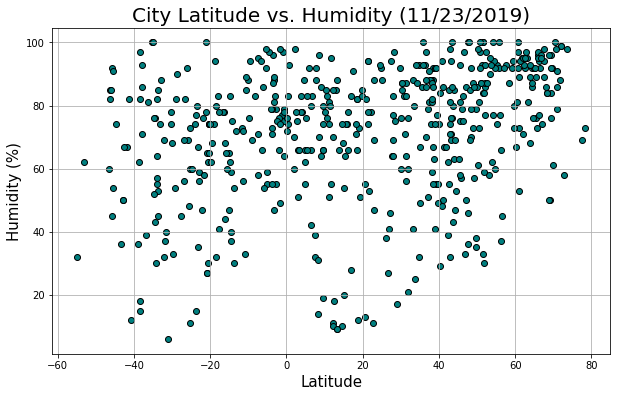

In [11]:
lat_humid = csv_df[['Lat','Humidity']]

#set figure size, for preference
plt.figure(figsize=(10,6))
#create scatter plot
plt.scatter(csv_df['Lat'],csv_df['Humidity'],color='teal',edgecolor='black')

#beautify the plot
plt.title(f'City Latitude vs. Humidity ({current_day})',size=20)
plt.ylabel('Humidity (%)',size=15)
plt.xlabel('Latitude',size=15)
plt.grid()
plt.savefig('output_data/city_humidity.png')
plt.show()
 

#### Latitude vs. Cloudiness Plot

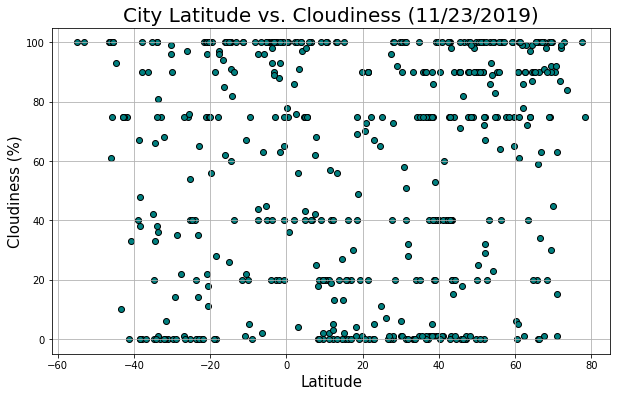

In [12]:
lat_cloud = csv_df[['Lat','Cloudiness']]

#set figure size, for preference
plt.figure(figsize=(10,6))
#create scatter plot
plt.scatter(csv_df['Lat'],csv_df['Cloudiness'],color='teal',edgecolor='black')

#beautify the plot
plt.title(f'City Latitude vs. Cloudiness ({current_day})',size=20)
plt.ylabel('Cloudiness (%)',size=15)
plt.xlabel('Latitude',size=15)
plt.grid()
plt.savefig('output_data/city_cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

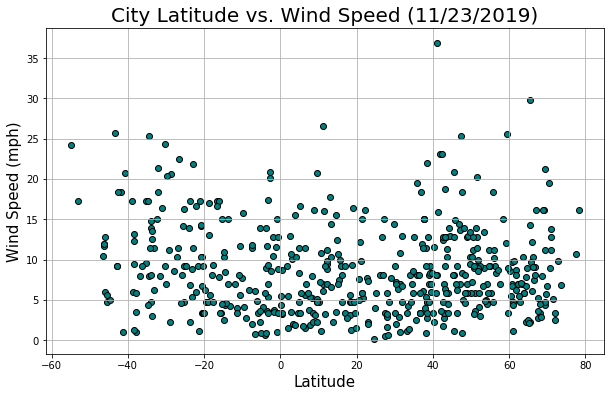

In [13]:
lat_cloud = csv_df[['Lat','Wind Speed']]

#set figure size, for preference
plt.figure(figsize=(10,6))
#create scatter plot
plt.scatter(csv_df['Lat'],csv_df['Wind Speed'],color='teal',edgecolor='black')

#beautify the plot
plt.title(f'City Latitude vs. Wind Speed ({current_day})',size=20)
plt.ylabel('Wind Speed (mph)',size=15)
plt.xlabel('Latitude',size=15)
plt.grid()
plt.savefig('output_data/city_wind.png')
plt.show()

# Analysis
* Please view the "City Latitude vs. Temperature" scatterplot. We can infer that there's a spectrum from the lowest to the highest latitude where the peak temperature is near 0.
* Please view the "City Latitude vs. Temperature"